In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
import warnings
warnings.filterwarnings('ignore', message=".*'numpy.int64' object has no attribute 'startswith'.*", category=UserWarning)

In [4]:
dataset=pd.read_csv('titanic_data.csv')  #reading data

In [5]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dataset.info() #thus age,cabin and embarked have missing values as evident from below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


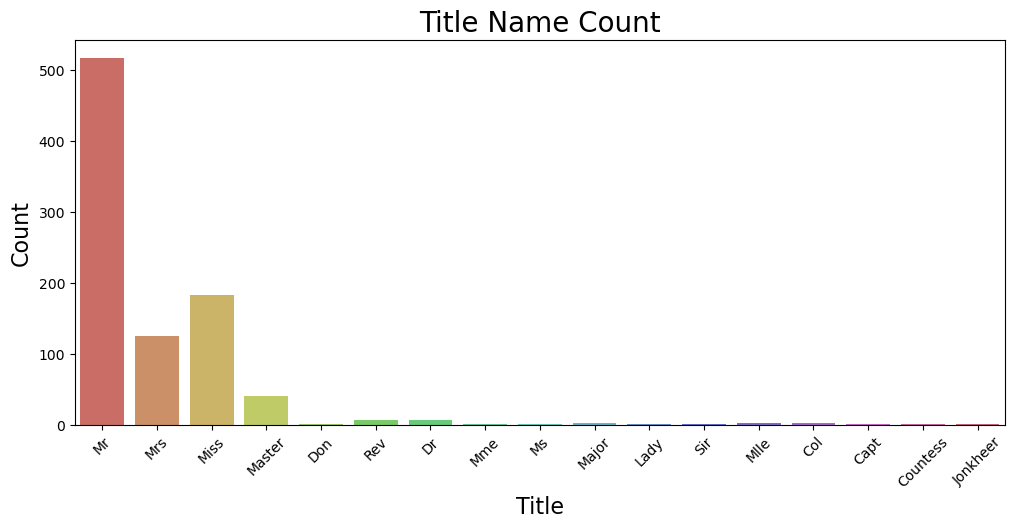

In [9]:
#plot of death count against the title
#using a regular expression to extract titles from names in the 'Name' column of a DataFrame and stores them in a new 'Title' column.
import re
dataset['Title'] = dataset.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graph
plt.figure(figsize=(12,5))
sns.countplot(x='Title', data=dataset, palette="hls")
plt.xlabel("Title", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [10]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
dataset['Title'] = dataset.Title.map(Title_Dictionary)

In [11]:
#printing the chance to survive by each title
print("Chances to survive based on titles: ") 
print(dataset.groupby("Title")["Survived"].mean())

Chances to survive based on titles: 
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


AttributeError: 'numpy.int64' object has no attribute 'startswith'

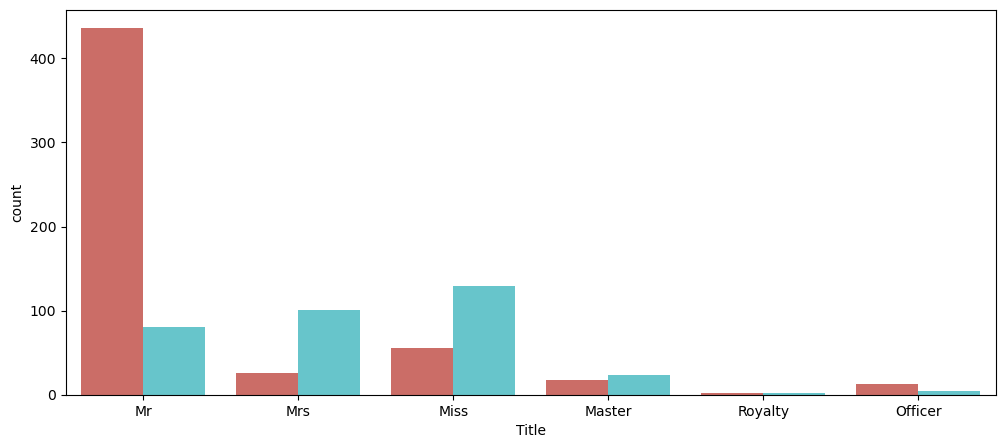

In [12]:
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived 
sns.countplot(x='Title', data=dataset, palette="hls",hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

In [13]:
#analysing the relationship between passenger class and survival rate by calculating the mean survival rate for each class.
res=dataset.groupby(['Pclass'], as_index=False)['Survived'].mean()
res

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


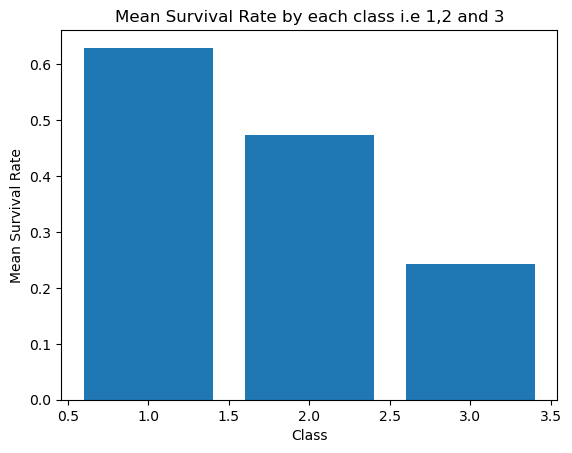

In [14]:
#plotting survived against class 
plt.bar(res['Pclass'],res['Survived'])
plt.title('Mean Survival Rate by each class i.e 1,2 and 3')
plt.xlabel('Class')
plt.ylabel('Mean Survival Rate')
plt.show()

<Axes: xlabel='Survived'>

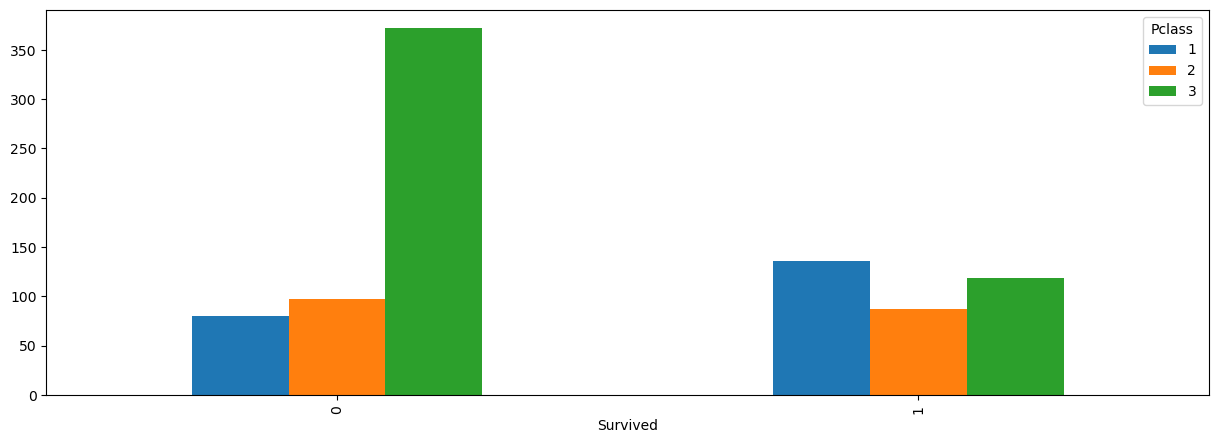

In [15]:
survive_pclass=pd.crosstab(dataset.Survived,dataset.Pclass)
survive_pclass.plot(kind='bar',figsize=(15,5))

C:\Users\sebo1\AppData\Local\Temp\ipykernel_13640\3771732601.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset.Survived == 1]["Fare"],  bins=50, color='b')
C:\Users\sebo1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sebo1\AppData\Local\Temp\ipykernel_13640\3771732601.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a

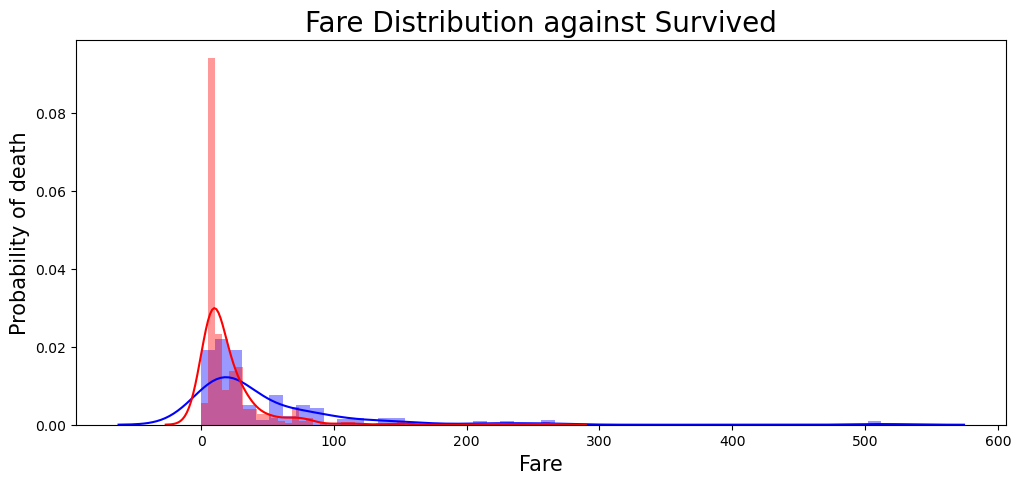

In [16]:
plt.figure(figsize=(12,5)) 
sns.distplot(dataset[dataset.Survived == 1]["Fare"],  bins=50, color='b')
sns.distplot(dataset[dataset.Survived == 0]["Fare"], bins=50, color='r')
plt.title("Fare Distribution against Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Probability of death",fontsize=15)
plt.show()

In [17]:
result=dataset.groupby(['Sex'], as_index=False)['Survived'].mean()
result

,Sex,Survived
0,female,0.742038
1,male,0.188908


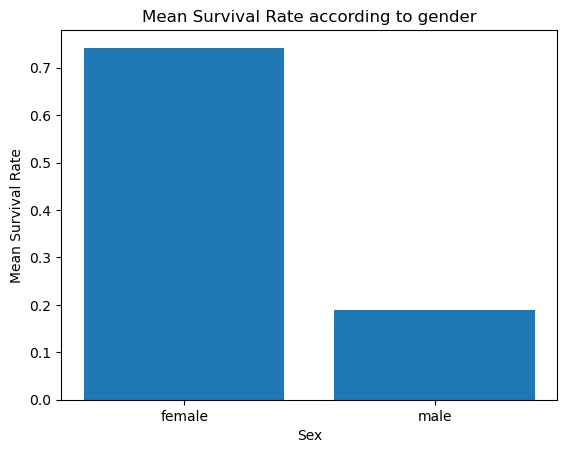

In [18]:
plt.bar(result['Sex'],result['Survived'])
plt.title('Mean Survival Rate according to gender')
plt.xlabel('Sex')
plt.ylabel('Mean Survival Rate')
plt.show()

In [19]:
result=dataset.groupby(['Embarked'], as_index=False)['Survived'].mean()
result

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


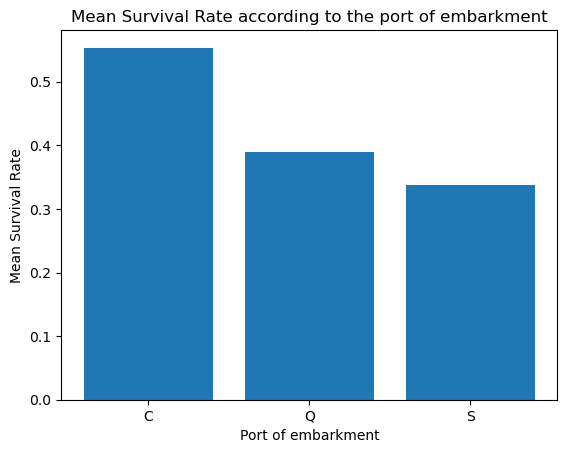

In [20]:
plt.bar(result['Embarked'],result['Survived'])
plt.title('Mean Survival Rate according to the port of embarkment')
plt.xlabel('Port of embarkment')
plt.ylabel('Mean Survival Rate')
plt.show()

In [21]:
result=dataset.groupby(['Parch'], as_index=False)['Survived'].mean()
result

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


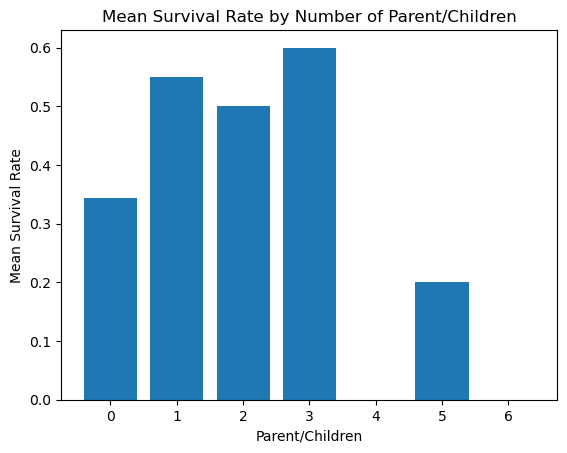

In [22]:
plt.bar(result['Parch'],result['Survived'])
plt.title('Mean Survival Rate by Number of Parent/Children')
plt.xlabel('Parent/Children')
plt.ylabel('Mean Survival Rate')
plt.show()

In [23]:
result=dataset.groupby(['SibSp'], as_index=False)['Survived'].mean()
result

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


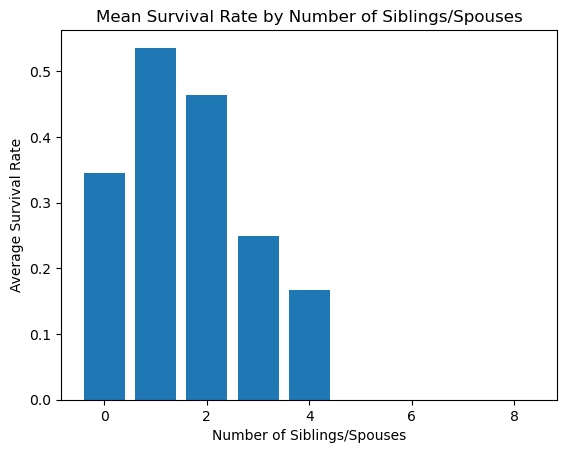

In [24]:
plt.bar(result['SibSp'], result['Survived'])
plt.title('Mean Survival Rate by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Average Survival Rate')
plt.show()

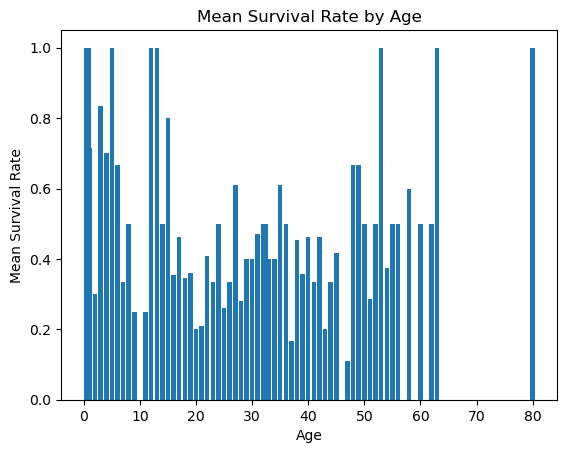

In [25]:
result=dataset.groupby(['Age'], as_index=False)['Survived'].mean()
plt.bar(result['Age'],result['Survived'])
plt.title('Mean Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Mean Survival Rate')
plt.show()

C:\Users\sebo1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


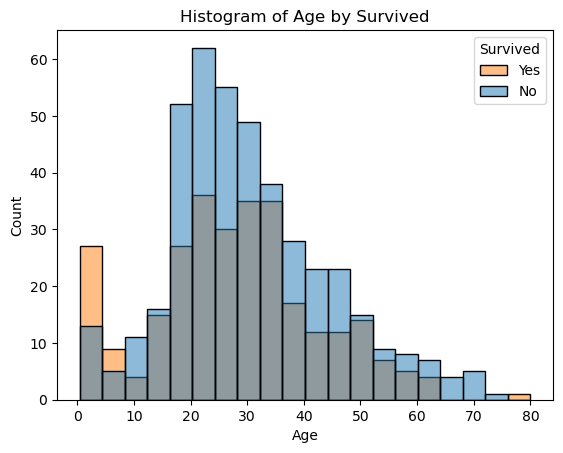

In [26]:
#plt.figure(figsize=(8, 4))
sns.histplot(data=dataset, x='Age', hue='Survived',bins=20)
plt.title('Histogram of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

In [27]:
dataset.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            1
dtype: int64

In [28]:
dataset.drop(columns=['Name','Ticket','Cabin'],inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [29]:
dataset.duplicated().sum() #need to drop duplicates after checking the number of duplicates which is 0 here 

0

In [30]:
dataset.info() #only age and embarked have nan values now as the irrelevant ones have been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        890 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [31]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [32]:
#filling the null values in age after finding median of each age group corresponding to a particular sex,class and title
median_age = dataset.groupby(['Sex','Pclass','Title'])['Age'].transform('median')
dataset.fillna({'Age':median_age},inplace=True)

In [33]:
#replacing the null values in embarked column with the most frequent value
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [34]:
#one hot encoding
dataset= pd.get_dummies(dataset, columns=['Embarked'], prefix='Embarked')

In [35]:
dataset= pd.get_dummies(dataset, columns=['Sex'], prefix='Sex')

In [36]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,Mr,False,False,True,False,True
1,2,1,1,38.0,1,0,71.2833,Mrs,True,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,Miss,False,False,True,True,False
3,4,1,1,35.0,1,0,53.1000,Mrs,False,False,True,True,False
4,5,0,3,35.0,0,0,8.0500,Mr,False,False,True,False,True


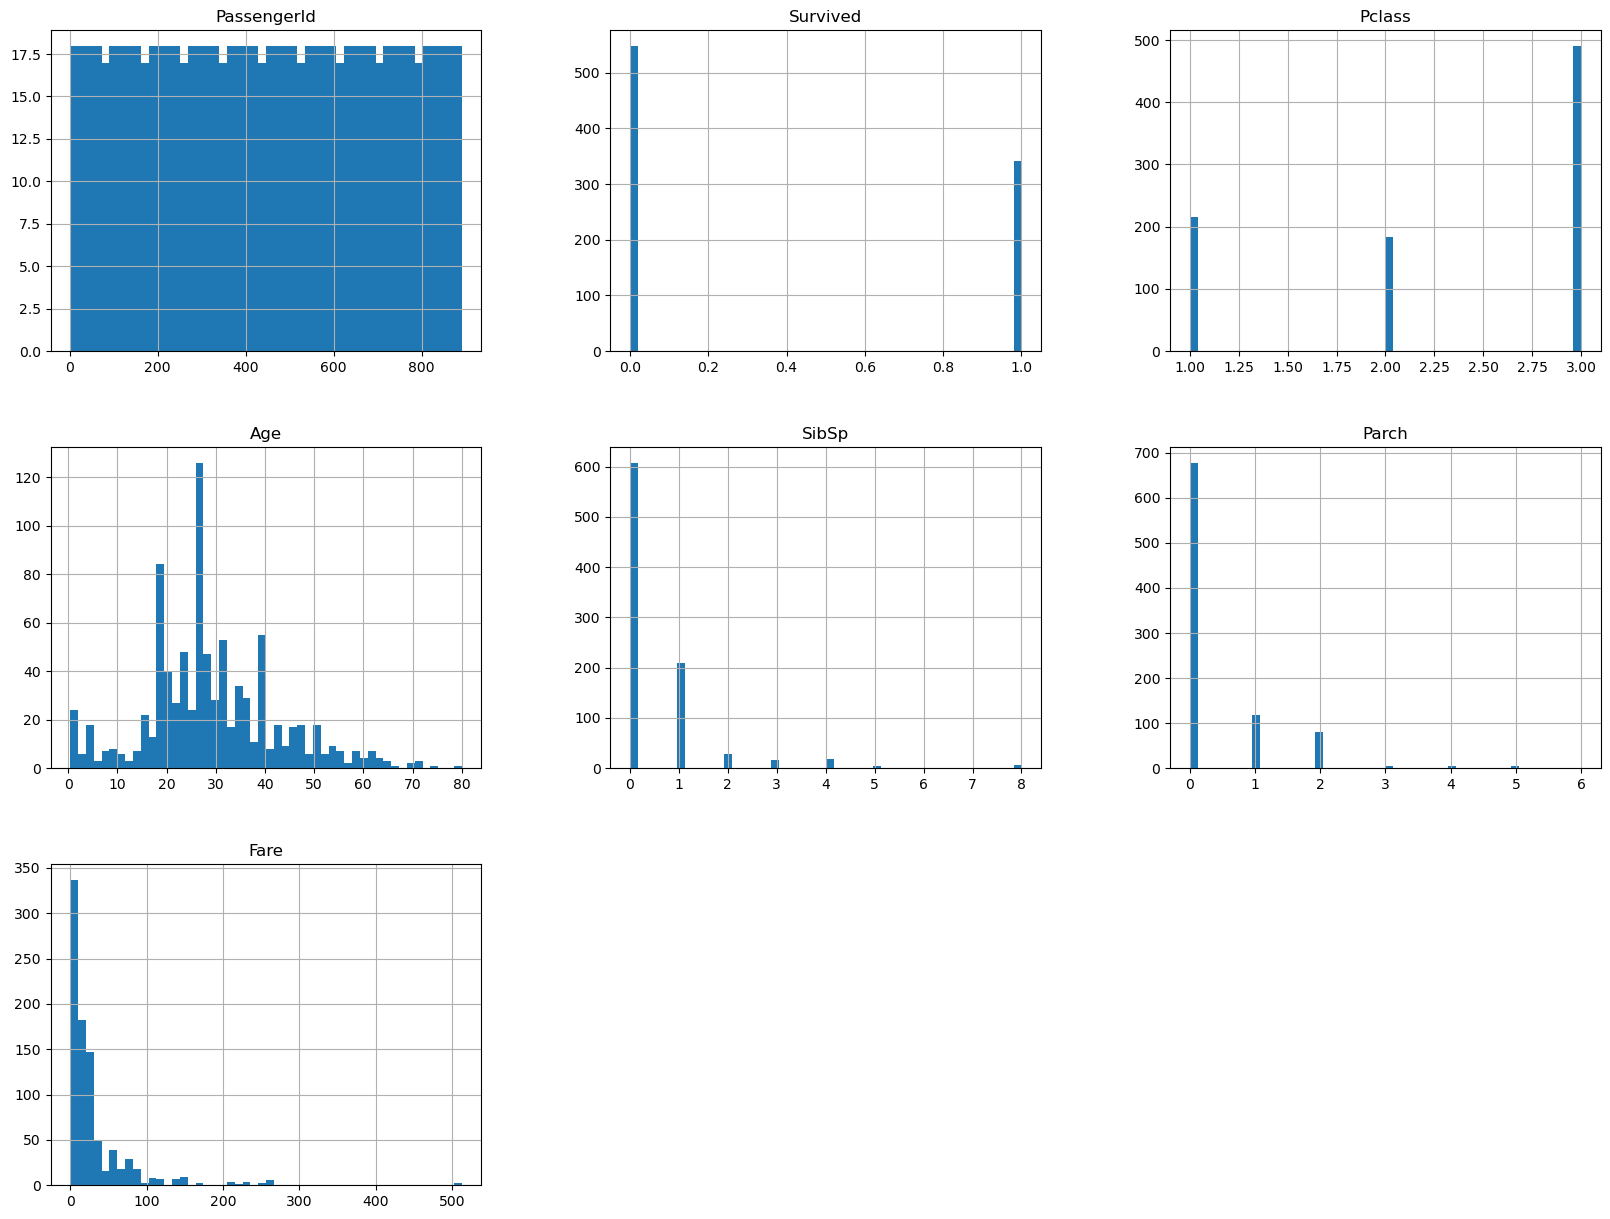

In [37]:
dataset.hist(bins=50,figsize=(20,15))  
plt.show()

<Axes: >

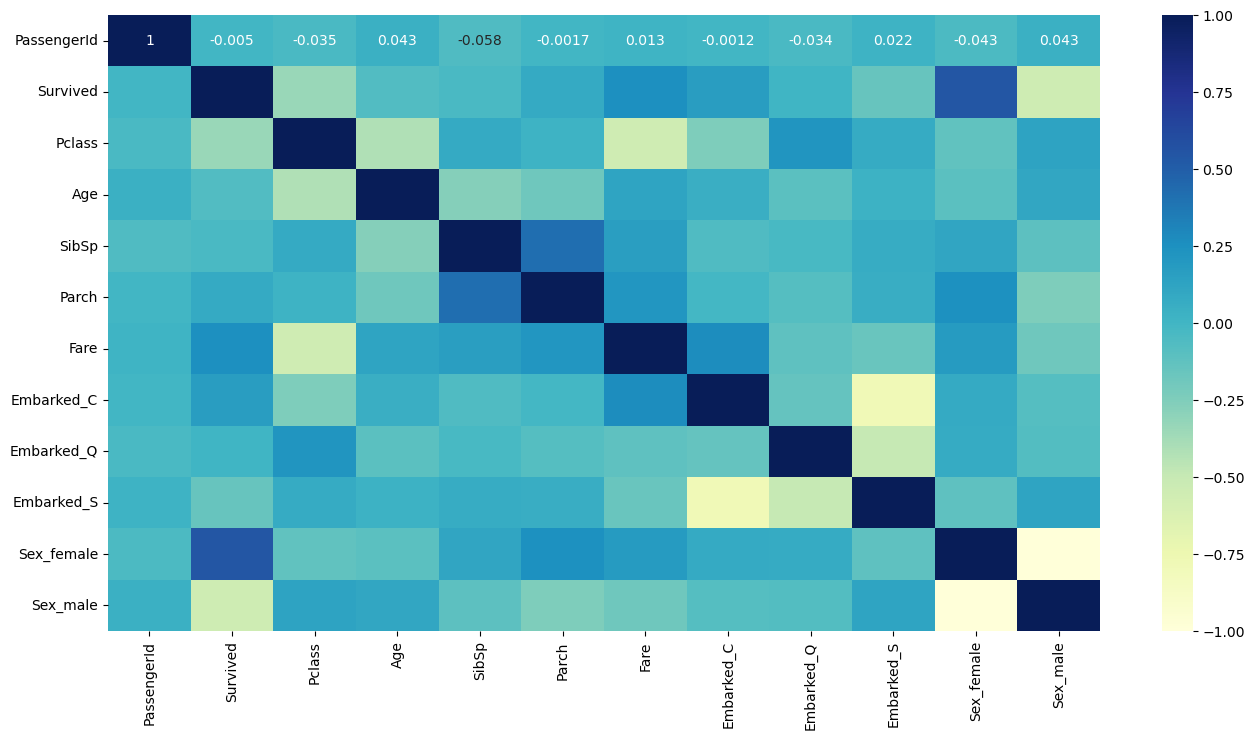

In [38]:
plt.figure(figsize=(16,8))
dataset.drop(columns=['Title'],inplace=True)
sns.heatmap(dataset.corr(),vmax=1.0,cmap="YlGnBu", annot=True)
#plt.show()   

In [39]:
dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,5,0,3,35.0,0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,False,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True,True,False
888,889,0,3,18.0,1,2,23.4500,False,False,True,True,False
889,890,1,1,26.0,0,0,30.0000,True,False,False,False,True


In [40]:
dataset.info() #no more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_C   891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
 10  Sex_female   891 non-null    bool   
 11  Sex_male     891 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 53.2 KB


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = dataset.drop('Survived',axis=1)
y = dataset['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
len(x_train)

712

In [44]:
len(x_test)

179

In [45]:
#scaling to reduce deviations in the dataset and thus improce overall performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming it
x_train_scaled = scaler.fit_transform(x_train)
# Transforming the test data using the same scaler
x_test_scaled = scaler.fit_transform(x_test)
y_train_scaled =scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()

In [48]:
lr.fit(x_train,y_train)

C:\Users\sebo1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
lr.predict(x_train)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [50]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [51]:
lr.score(x_train,y_train)

0.8019662921348315

In [52]:
lr.score(x_test,y_test)

0.8100558659217877

In [53]:
acc_lr= accuracy_score(y_test, y_pred_lr)
acc_lr

0.8100558659217877

In [54]:
from sklearn.metrics import roc_auc_score
y_pred_proba = lr.predict_proba(x_test)[:, 1]  # getting probabilities of positive class
roc_score_lr = roc_auc_score(y_test, y_pred_proba)
roc_score_lr

0.8821106821106821

AttributeError: module 'matplotlib.pyplot' has no attribute 'y'

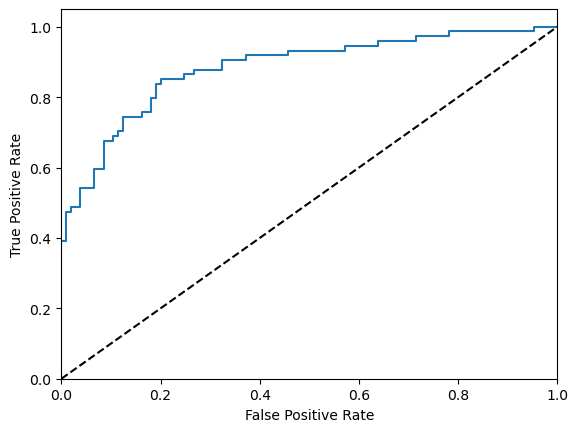

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.y

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifiers ={
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}
classifiers_scores={}

for name,clf in classifiers.items():
    cv_scores=cross_val_score(clf,x,y,cv=21,scoring='accuracy')  #thus using 21-fold cross validation
    #cv value from trial and error 
    #with increase in cv to 19 rf was 81.44 and lr was 79.8 but till 18 rf was 82.8 and lr was 79.6
    #at cv=20 rf was 81.6 and lr was 80.08
    #at cv=21 rf was 82.9 and lr was 79.8
    #so we will take cv=21
    classifiers_scores[name]=cv_scores.mean()

classifiers_df=pd.DataFrame(list(classifiers_scores.items()), columns=['Classifier', 'Score'])
#classifiers_df = pd.DataFrame({'Classifier': classifiers_names, 'Score': classifiers_scores})
classifiers_df

C:\Users\sebo1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sebo1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,Classifier,Score
0,RandomForestClassifier,0.825028
1,DecisionTreeClassifier,0.719005
2,SVC,0.656700
3,LogisticRegression,0.796815


In [61]:
#from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=None, min_samples_split=200, min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [62]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=200,
                       random_state=42)

In [63]:
y_pred_dt=dt.predict(x_test)

In [64]:
dt.score(x_train,y_train)

0.800561797752809

In [65]:
dt.score(x_test,y_test)

0.776536312849162

In [66]:
acc_dt=accuracy_score(y_test, y_pred_dt)
acc_dt

0.776536312849162

In [67]:
from sklearn.metrics import roc_auc_score
y_pred_proba = dt.predict_proba(x_test)[:, 1] 
roc_score_dt = roc_auc_score(y_test, y_pred_proba)
roc_score_dt

0.8725225225225226

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [69]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
rfc.score(x_train,y_train)

1.0

In [71]:
rfc.score(x_test,y_test) #overftting

0.8212290502793296

In [72]:
#hyperparameter tuning to prevent overfitting as seen earlier
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [30,50,100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
random_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)
random_search.fit(x, y)
# Printing the best parameters and the corresponding score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")
best_rf = random_search.best_estimator_

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8148148148148148


In [73]:
best_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_leaf_nodes=7, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [74]:
y_pred_rf=best_rf.predict(x_test)

In [75]:
best_rf.score(x_train,y_train)

0.8398876404494382

In [76]:
best_rf.score(x_test,y_test)

0.7932960893854749

In [77]:
acc_rf=accuracy_score(y_test, y_pred_rf)
acc_rf

0.7932960893854749

In [78]:
from sklearn.metrics import roc_auc_score
y_pred_proba = best_rf.predict_proba(x_test)[:, 1] 
roc_score_rf = roc_auc_score(y_test, y_pred_proba)
roc_score_rf

0.8801801801801803

AttributeError: module 'matplotlib.pyplot' has no attribute 'y'

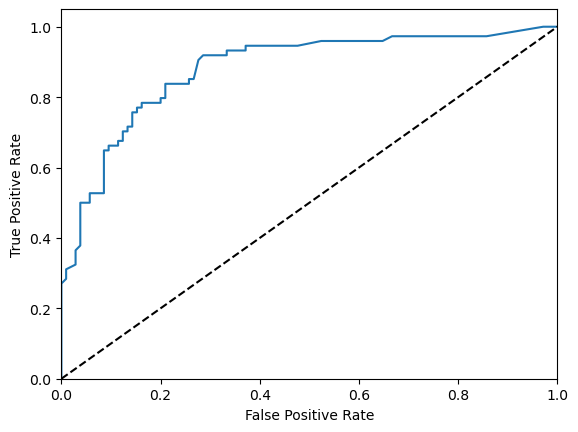

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.y

In [80]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train , y_train)

SVC()

In [81]:
y_pred_svc=model.predict(x_test)

In [82]:
model.score(x_train,y_train)

0.6502808988764045

In [83]:
model.score(x_test,y_test)

0.5977653631284916

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(model,param_grid, cv=5)
grid.fit(x_train, y_train)
best_svc=grid.best_estimator_

In [85]:
best_svc.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [86]:
best_svc.score(x_train,y_train)

0.875

In [87]:
best_svc.score(x_test,y_test)

0.8044692737430168

In [88]:
from sklearn.metrics import roc_auc_score
roc_score_svc = roc_auc_score(y_test,best_svc.decision_function(x_test))
roc_score_svc

0.8325611325611326

In [89]:
acc_svc=accuracy_score(y_test, y_pred_svc)
acc_svc

0.5977653631284916

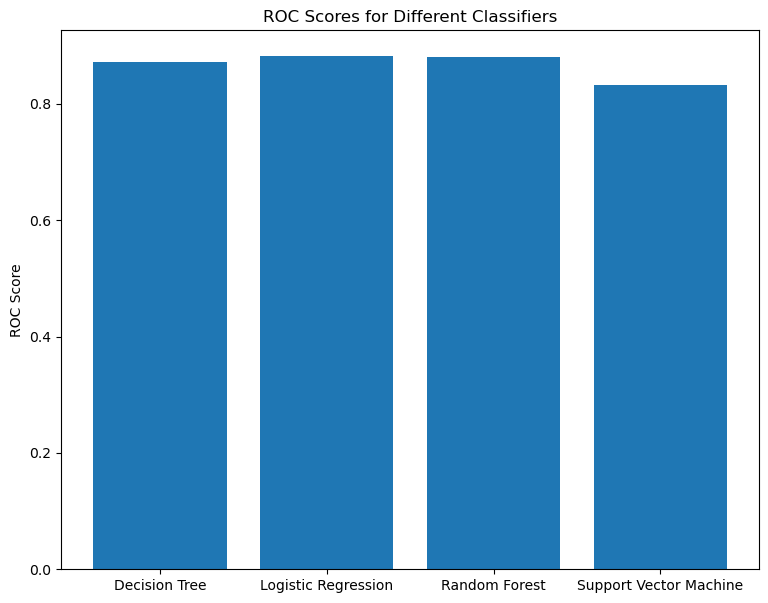

In [90]:
roc_scores = {
    'Decision Tree': roc_score_dt,
    'Logistic Regression':roc_score_lr,
    'Random Forest':roc_score_rf,
    'Support Vector Machine':roc_score_svc
}
plt.figure(figsize=(9, 7))
plt.bar(range(len(roc_scores)), list(roc_scores.values()))
plt.xticks(range(len(roc_scores)), list(roc_scores.keys()))
plt.ylabel('ROC Score')
plt.title('ROC Scores for Different Classifiers')
plt.show()

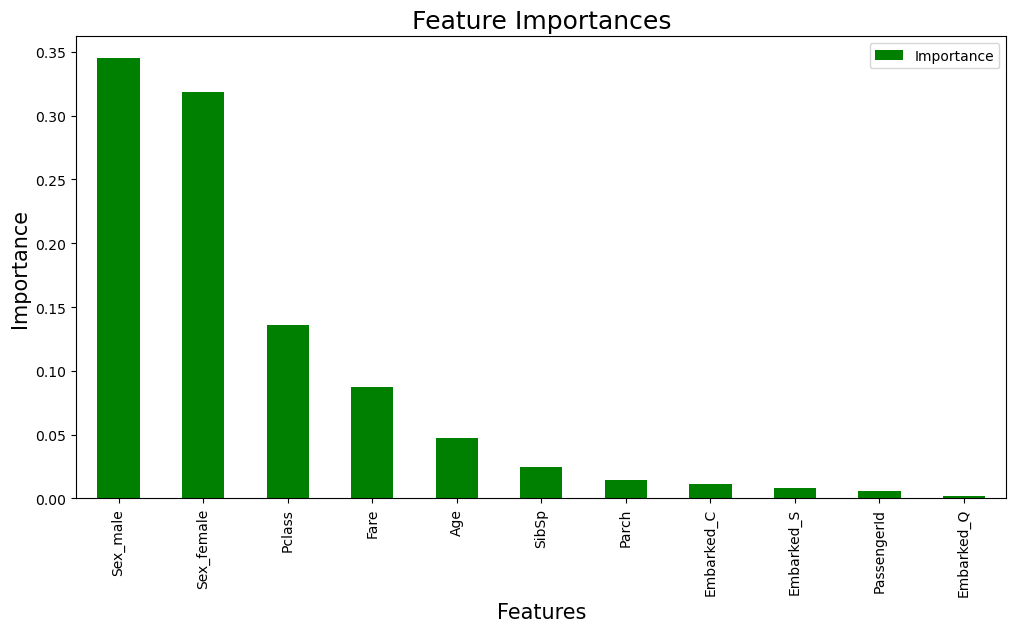

In [91]:
#printing the importance of each feature for random forest classifier
feature_importances = pd.DataFrame({
    'Feature':x.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.plot(kind='bar', x='Feature', y='Importance', color='Green', figsize=(12, 6))
plt.title('Feature Importances', size=18)
plt.xlabel('Features', size=15)
plt.ylabel('Importance', size=15)
plt.show()

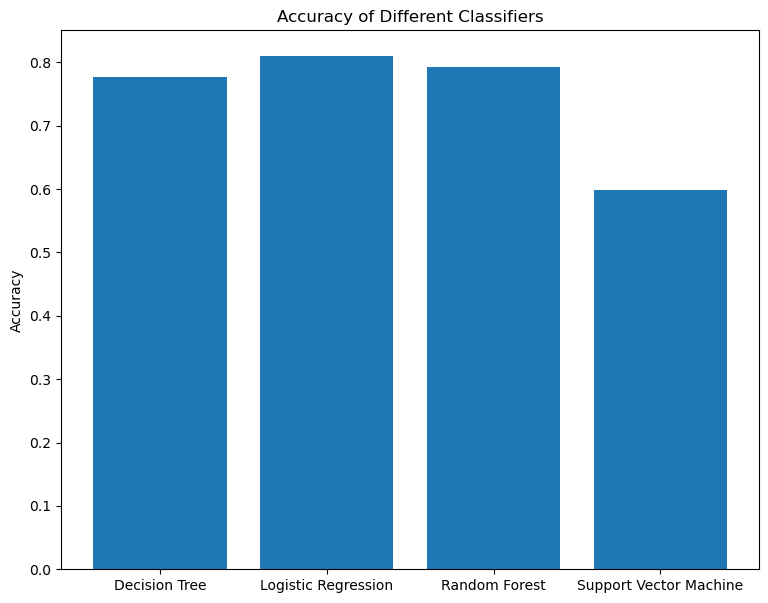

In [92]:
acc_scores = {
    'Decision Tree': acc_dt,
    'Logistic Regression':acc_lr,
    'Random Forest':acc_rf,
    'Support Vector Machine':acc_svc
}
plt.figure(figsize=(9, 7))
plt.bar(range(len(acc_scores)), list(acc_scores.values()))
plt.xticks(range(len(acc_scores)), list(acc_scores.keys()))
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix #making confusion matrix for the algorithm with best accuracy
cm = confusion_matrix(y_test, y_pred_lr)

In [94]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
precision

0.7857142857142857

In [95]:
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
recall

0.7432432432432432

In [96]:
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
accuracy

0.8100558659217877

In [97]:
error_rate = 1 - accuracy
error_rate

0.1899441340782123

In [98]:
cm

array([[90, 15],
       [19, 55]], dtype=int64)

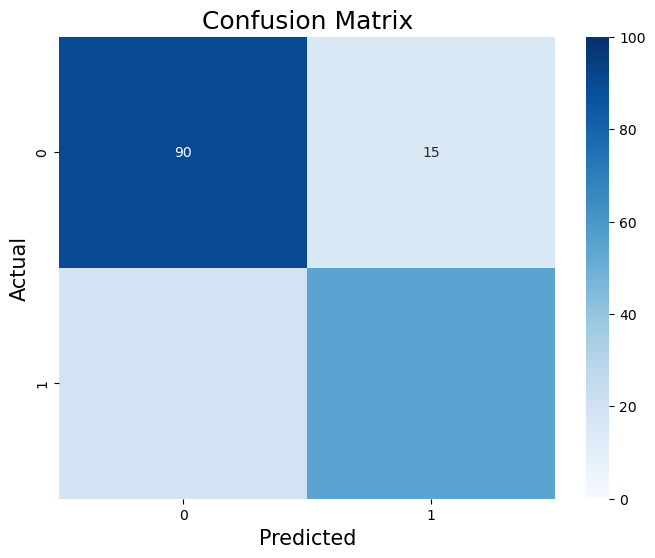

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues',vmin=0, vmax=100)
plt.xlabel('Predicted', size=15)
plt.ylabel('Actual', size=15)
plt.title('Confusion Matrix', size=18)
plt.show()

In [100]:
#survival prediction using ann

In [101]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(18,activation='relu', input_dim=11,kernel_initializer='uniform'))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.50))
# adding a second hidden layer
model.add(Dense(60, kernel_initializer='uniform', activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.50))
# adding a third hidden layer
model.add(Dense(80, kernel_initializer='uniform', activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.50))
# adding the output layer that is binary [0,1]
model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))

# Compiling the model
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
model.fit(x_train.astype(np.float32), y_train.astype(np.float32),batch_size=60, epochs=600, verbose=2) #increase in epochs caused accuracy to increase
#Visualizing the model
model.summary()

C:\Users\sebo1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/600
12/12 - 2s - 201ms/step - accuracy: 0.5506 - loss: 0.6822
Epoch 2/600
12/12 - 0s - 4ms/step - accuracy: 0.6250 - loss: 0.6749
Epoch 3/600
12/12 - 0s - 4ms/step - accuracy: 0.6236 - loss: 0.6733
Epoch 4/600
12/12 - 0s - 4ms/step - accuracy: 0.6236 - loss: 0.6785
Epoch 5/600
12/12 - 0s - 4ms/step - accuracy: 0.6264 - loss: 0.6800
Epoch 6/600
12/12 - 0s - 4ms/step - accuracy: 0.6236 - loss: 0.6682
Epoch 7/600
12/12 - 0s - 4ms/step - accuracy: 0.6236 - loss: 0.6633
Epoch 8/600
12/12 - 0s - 5ms/step - accuracy: 0.6264 - loss: 0.6654
Epoch 9/600
12/12 - 0s - 4ms/step - accuracy: 0.6292 - loss: 0.6592
Epoch 10/600
12/12 - 0s - 4ms/step - accuracy: 0.6376 - loss: 0.6387
Epoch 11/600
12/12 - 0s - 4ms/step - accuracy: 0.6461 - loss: 0.6551
Epoch 12/600
12/12 - 0s - 3ms/step - accuracy: 0.6587 - loss: 0.6376
Epoch 13/600
12/12 - 0s - 5ms/step - accuracy: 0.6517 - loss: 0.6401
Epoch 14/600
12/12 - 0s - 6ms/step - accuracy: 0.6404 - loss: 0.6424
Epoch 15/600
12/12 - 0s - 5ms/step - accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           1,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           4,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,953 (74.04 KB)

 Trainable params: 6,317 (24.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,636 (49.36 KB)

In [102]:
y_preds = model.predict(x_test.astype(np.float32))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [103]:
scores = model.evaluate(x_train.astype(np.float32), y_train.astype(np.float32), batch_size=60)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7898 - loss: 0.4391  
compile_metrics: 79.21%


In [104]:
scores = model.evaluate(x_test.astype(np.float32), y_test.astype(np.float32), batch_size=60)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - loss: 0.4576 
compile_metrics: 75.98%
